In [1]:
import os,glob
import numpy as np
import pandas as pd
import glob
import pyslha
import time
import progressbar as P
from atlas_susy_2018_13_Recast import getLLPCandidates, getDisplacedJets
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
import pyslha
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

delphesDir = os.path.abspath("./DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')


Welcome to JupyROOT 6.30/02


True

In [2]:
inputFile = './pp2GoGo/Events/run_07/gluino_tau_1_delphes_events.root'

In [3]:
f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()

r_dec = []
for ievt in range(nevts):    

    tree.GetEntry(ievt)
    llpCandidates = getLLPCandidates(tree.llps,tree.llpDaughters)
    for llp in llpCandidates:
        r_dec.append(llp.r_decay)
    


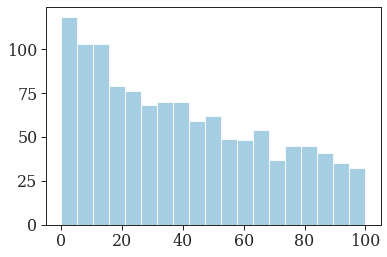

In [4]:
plt.hist(r_dec,bins=np.linspace(0.,100,20))
# plt.yscale('log')
# plt.xlim(0.,100.)
plt.show()


In [5]:
f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()

tree.GetEntry(0)
print('d=',tree.llpDaughters.GetEntries())
llpCandidates = getLLPCandidates(tree.llps,tree.llpDaughters)

for llp in llpCandidates:
    print(llp.PID,llp.D1,llp.D2,llp.Xd,llp.E,llp.X)
    for i in range(llp.D1,llp.D1+5):
        dd = tree.llpDaughters.At(i)
        print('  ',dd.PID,dd.Status,dd.M1,dd.M2)
        

d= 1615
1000021 0 664 -73.08136749267578 1733.0087890625 -73.08136749267578
   -1 23 0 0
   1 23 0 0
   1000022 1 0 0
   -211 1 -1 -1
   211 1 -1 -1
1000021 665 1614 128.61924743652344 1862.2821044921875 128.61924743652344
   -1 23 1 1
   1 23 1 1
   1000022 23 1 1
   1000022 1 -1 -1
   -211 1 -1 -1


In [13]:
njet = tree.GenJet.GetEntries()
print('njet=',njet)
for j in range(njet):
    print(tree.GenJet.At(j).PT)

njet= 4
1184.402099609375
666.4342041015625
382.39056396484375
26.800453186035156


In [7]:
jets = getDisplacedJets(tree.GenJet,tree.llps,tree.llpDaughters)

In [8]:
len(jets)

3

In [9]:
for llp in llpCandidates:
    print(llp.Xd,llp.Yd,llp.Zd)

-73.08136749267578 68.16239166259766 -38.72924041748047
128.61924743652344 -121.34330749511719 131.07666015625


In [12]:
for j in jets:
    print('jet:',j.PT,j.llp.PID,j.llp.X)

jet: 1184.402099609375 1000021 -73.08136749267578
jet: 666.4342041015625 1000021 128.61924743652344
jet: 382.39056396484375 1000021 128.61924743652344


In [19]:
for ij in range(tree.GenJet.GetEntries()):
    jet = tree.GenJet.At(ij)
    print('jet=',jet.PT)
    for iid in range(tree.llpDaughters.GetEntries()):
        d = tree.llpDaughters.At(iid)
        if d.M1 < 0: continue
        if d.PID == 1000022: continue
        deltaR = np.sqrt((jet.Eta-d.Eta)**2 + (jet.Phi-d.Phi)**2)
        print(d.PID,deltaR,d.M1)
    print('\n')
    

jet= 1184.402099609375
-1 0.24454289890040573 0
1 0.17897295077371433 0
-1 3.000517490978887 1
1 4.615221662097984 1


jet= 666.4342041015625
-1 4.603117522585323 0
1 4.613850260593925 0
-1 1.9385068678804618 1
1 0.010790823449570322 1


jet= 382.39056396484375
-1 3.0588282552695945 0
1 2.948049030493578 0
-1 0.023640926652934085 1
1 1.944297458591697 1


jet= 26.800453186035156
-1 3.5231930875621207 0
1 3.1001211705977285 0
-1 3.9435215235879295 1
1 5.868649206117747 1


